# EEG brain wave for confusion

## For variable selection and causal inference. Challenging for classification

**Description**

We collected EEG signal data from 10 college students while they watched MOOC video clips. We extracted online education videos that are assumed not to be confusing for college students, such as videos of the introduction of basic algebra or geometry. We also prepare videos that are expected to confuse a typical college student if a student is not familiar with the video topics like Quantum Mechanics, and Stem Cell Research. We prepared 20 videos, 10 in each category. Each video was about 2 minutes long. We chopped the two-minute clip in the middle of a topic to make the videos more confusing. The students wore a single-channel wireless MindSet that measured activity over the frontal lobe. The MindSet measures the voltage between an electrode resting on the forehead and two electrodes (one ground and one reference) each in contact with an ear. After each session, the student rated his/her confusion level on a scale of 1-7, where one corresponded to the least confusing and seven corresponded to the most confusing. These labels if further normalized into labels of whether the students are confused or not. This label is offered as self-labelled confusion in addition to our predefined label of confusion.

## <a href='#method1'>Method 1: Logistic Regression<a/>

## <a href='#method2'>Method 2: Neural Network<a/>

## <a href='#method3'>Method 3: KNN<a/>

# Setup

This section will be dedicated to importing data and packages necessary for this project.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense

/home/collin/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
labels = ['Subject ID', 'Video ID', 'Attention', 'Mediation', 'Raw', 
          'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 
          'Gamma1', 'Gamma2', 'predefined_label', 'user-defined_label']

In [4]:
data = pd.read_csv('EEG data.csv', header = None, names = labels)

In [5]:
#Create X and y 
X = data.ix[:,:'predefined_label']
y = data.ix[:,'user-defined_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [6]:
#Create Scaled X
scaler = StandardScaler()
scaler.fit(data.drop('user-defined_label',axis=1))
scaled_features = scaler.transform(data.drop('user-defined_label',axis=1))
data_scaled = pd.DataFrame(scaled_features,columns=data.columns[:-1])

X_scaled = data_scaled.ix[:,:'predefined_label']


X_train_scaled, X_test_scaled, y_tran, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=14)

# Visualization

### Dataset

**Let's take a look at our dataset.**

In [7]:
data.head(5)

,Subject ID,Video ID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefined_label,user-defined_label
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


### Check for Missing data

**Let's make a heat map of all of the data that is null to check for missing data.**



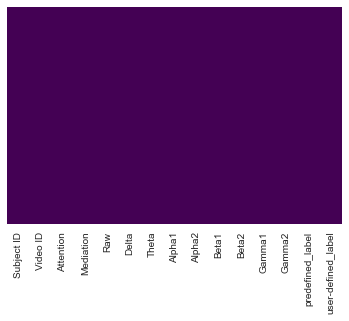

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

### Correlations

This is just a quick correlation matrix to check if there is anything obvious I can use in the dataset.

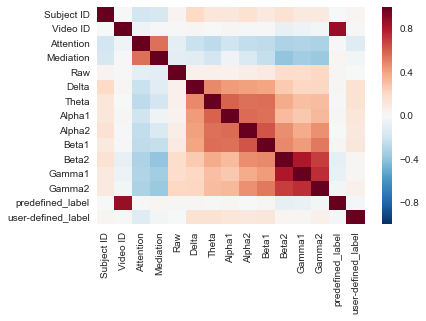

In [9]:
sns.heatmap(data.corr())

# <a id=method1><u>Method 1: Logistic Regression</u></a>

## Training

In [10]:
model= LogisticRegression()

In [11]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Testing

In [12]:
lr_predictions = model.predict(X_test)

In [13]:
print(classification_report(y_test,lr_predictions))

             precision    recall  f1-score   support

        0.0       0.57      0.64      0.60      1867
        1.0       0.62      0.55      0.58      1977

avg / total       0.60      0.59      0.59      3844



In [14]:
confusion_matrix(y_test, lr_predictions)

array([[1196,  671],
       [ 895, 1082]])

## Method 1 Conclusion


Logistic regression seems to be the closest to 64% accuracy which was what the original dataset owner said was an acceptable accuracy.  

# <a id=method2><u>Method 2: Basic Neural Network</u></a>

## Setup

In [15]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [16]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=14))
model.add(Dense(1, activation='softmax'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training

In [18]:
model.fit(X_train.values, y_train.values, nb_epoch=40, verbose=0)

## Testing

In [19]:
scores = model.evaluate(X_test.values, y_test.values, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 51.43%


## Method 2 Conclusion


Using a small neural network did not seem to be useful in this context.  I will need to look into deeper networks when I have more computational power.

# <a id=method3><u>Method 3: KNN</u></a>

## Training

#### Find the k with lowest error rate

In [20]:
error_rate = []

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

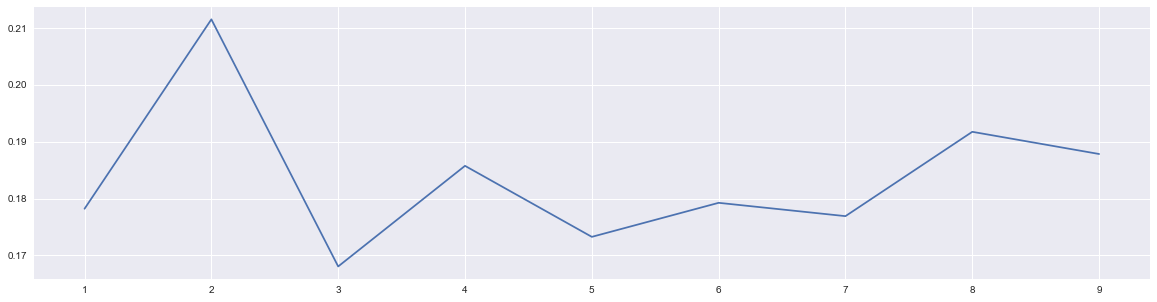

In [21]:
plt.figure(figsize=(20,5))
sns.plt.plot(range(1,10), error_rate)

### Train with the most optimal k

**It looks like taking 3 nearest neighbors yields the lowest error rate, so let's try that.**

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

## Testing

In [24]:
knn_predictions = knn.predict(X_test_scaled)

In [25]:
print(classification_report(y_test,knn_predictions))
confusion_matrix(y_test, knn_predictions)

             precision    recall  f1-score   support

        0.0       0.83      0.82      0.83      1867
        1.0       0.83      0.84      0.84      1977

avg / total       0.83      0.83      0.83      3844



array([[1537,  330],
       [ 316, 1661]])

## Method 3 Conclusion


It seems as though using this method yields the highest accuracy, but I am skeptical about its legitimacy because it is a little bit too high.  Since 64% is an acceptable accuracy I would guess that this model is overfitting.  The other reason could be that the video ID is a huge contributor to the models decision. 